In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv("penguins_size.csv")

In [2]:
#EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

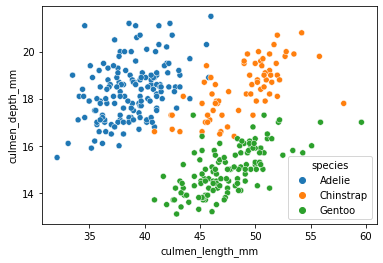

In [6]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species", data=df)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

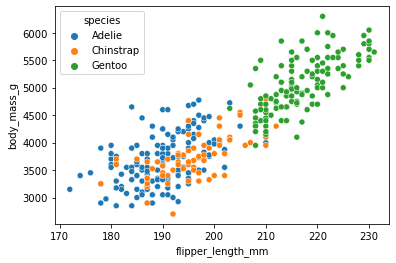

In [7]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df)

In [8]:
#K Mean Model
#remove null values, change to numerical values
df["island"] = pd.get_dummies(df["island"])
df["sex"] = pd.get_dummies(df["sex"])
df = df.dropna()

#set the X and Y values (predicting species)
y = df["species"]
X = df.drop("species", axis = 1)

In [9]:
#Train and scale the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
#predict the model (with K = 1 for now)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [12]:
#Check the accuracy and confusion matrix result
accuracy_score(y_test, y_pred)

0.9611650485436893

In [13]:
confusion_matrix(y_test,y_pred)

array([[39,  2,  0],
       [ 2, 23,  0],
       [ 0,  0, 37]], dtype=int64)

In [14]:
#Loop to calculate and store SSD rates for k 2-10
SSD_rates = []
for k in range(2,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    SSD = 1 - accuracy_score(y_test,y_pred)
    SSD_rates.append(SSD)

Text(0.5, 0, 'K Value')

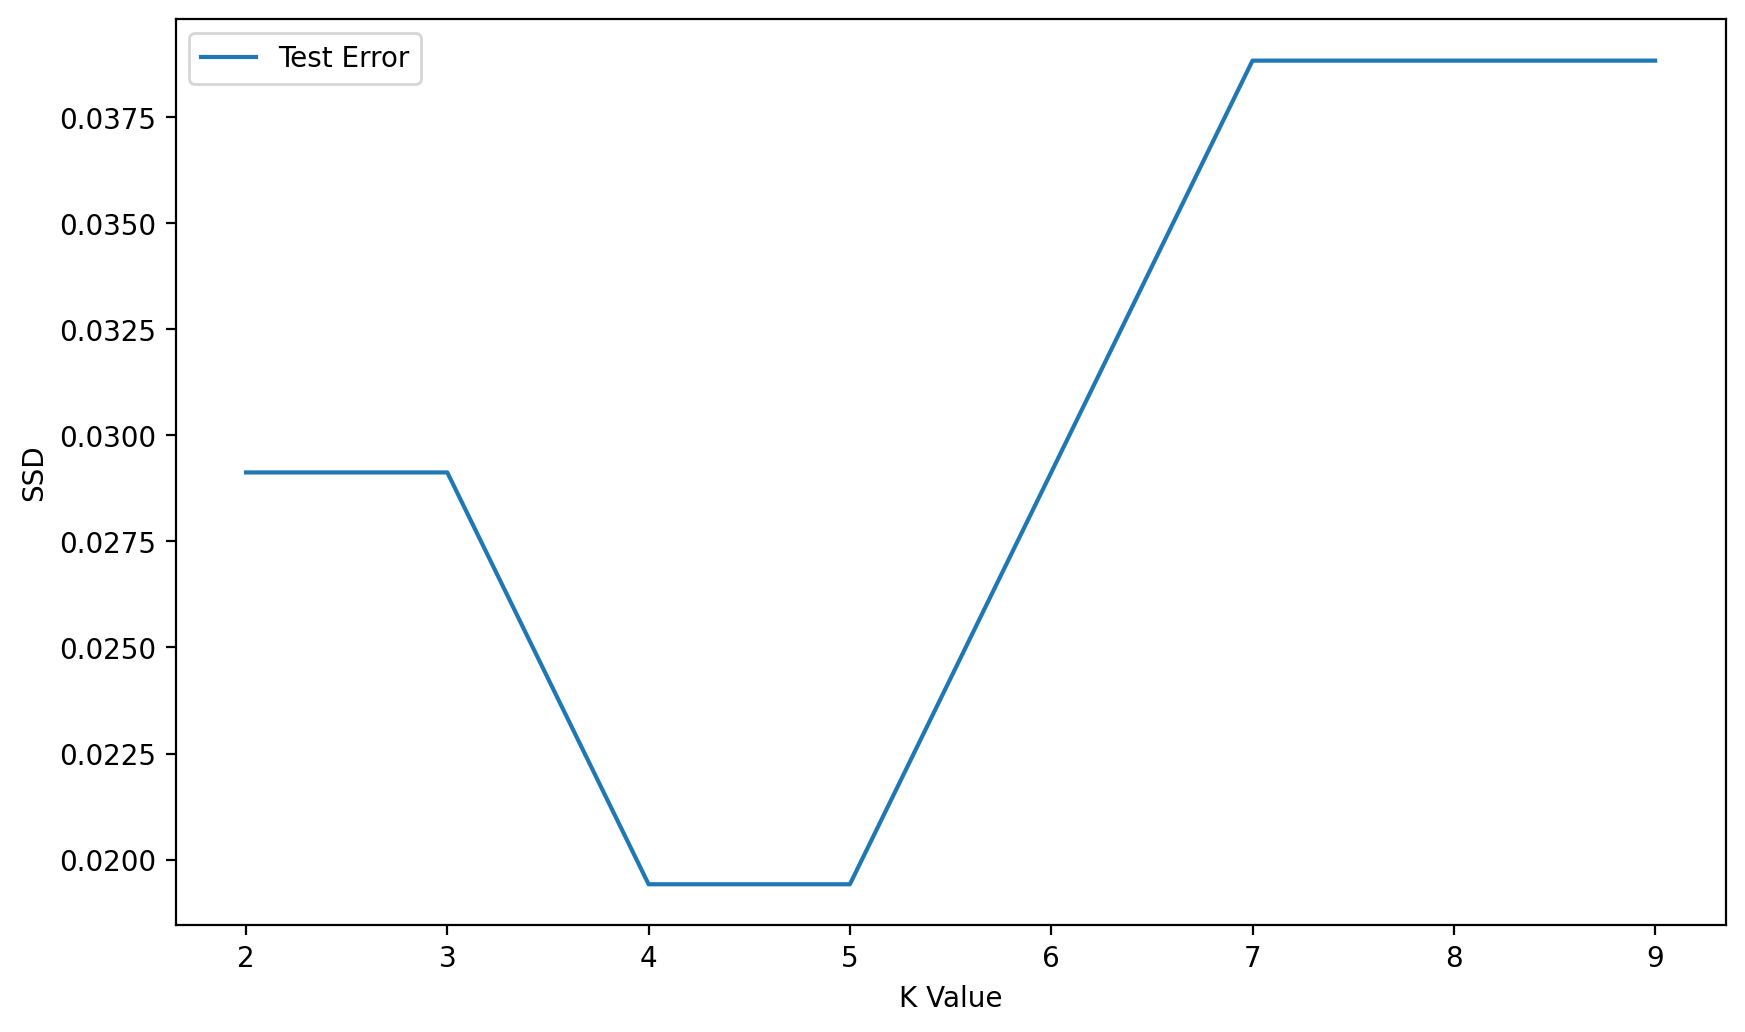

In [15]:
#plot the SSD rate array
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(2,10),SSD_rates,label="Test Error")
plt.legend()
plt.ylabel("SSD")
plt.xlabel("K Value")

In [16]:
#I think the model preformed fairly well overall, SSD is the best at 4-5 K and the accuracy rating is around 97-98%